In [73]:
#Importando as bibliotecas
import cv2
import matplotlib.pyplot as plt
import matplotlib
from random import randint

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
#%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w9 - Video Analysis\data"

In [74]:
trackerTypes = ['BOOSTING', 'MIL', 'KCF','TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']

In [75]:
def createTrackerByName(trackerType):
    # Create a tracker based on tracker name
    if trackerType == trackerTypes[0]:
        tracker = cv2.legacy.TrackerBoosting_create()
    elif trackerType == trackerTypes[1]:
        tracker = cv2.legacy.TrackerMIL_create()
    elif trackerType == trackerTypes[2]:
        tracker = cv2.legacy.TrackerKCF_create()
    elif trackerType == trackerTypes[3]:
        tracker = cv2.legacy.TrackerTLD_create()
    elif trackerType == trackerTypes[4]:
        tracker = cv2.legacy.TrackerMedianFlow_create()
    elif trackerType == trackerTypes[5]:
        tracker = cv2.legacy.TrackerGOTURN_create()
    elif trackerType == trackerTypes[6]:
        tracker = cv2.TrackerMOSSE_create()
    elif trackerType == trackerTypes[7]:
        tracker = cv2.legacy.TrackerCSRT_create()
    else:
        tracker = None
        print('Incorrect tracker name')
        print('Available trackers are:')
        for t in trackerTypes:
            print(t)

    return tracker

In [76]:
print("Default tracking algoritm is CSRT \n"
      "Available tracking algorithms are:\n")
for t in trackerTypes:
    print(t)

trackerType = "CSRT"

# Set video to load
videoPath = DATA_PATH + "videos/cycle.mp4"

Default tracking algoritm is CSRT 
Available tracking algorithms are:

BOOSTING
MIL
KCF
TLD
MEDIANFLOW
GOTURN
MOSSE
CSRT


## Step 1: Ler Vídeo

In [77]:
cap = cv2.VideoCapture(DATA_PATH + "/videos/video_out.mp4")

# Exit if video not opened.
if not cap.isOpened():
    print("Could not open video")

# Read first frame.
success, frame = cap.read()

if not success:
    print('Cannot read video file')

# Define a few colors for drawing
red = (0,0,255)
blue = (255,128,0)

## Step 2: Define inital bounding box

Text(0.5, 1.0, 'Tracking')

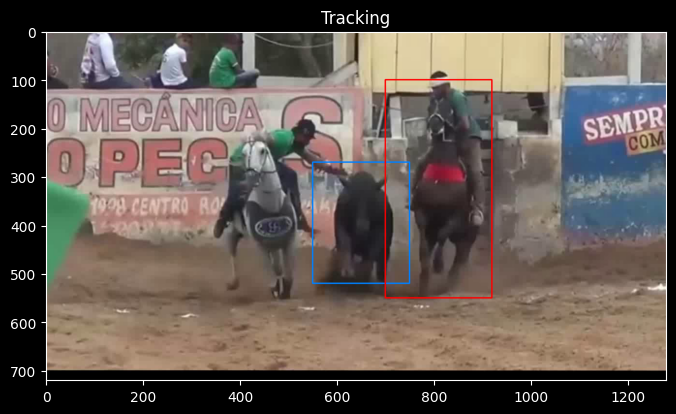

In [78]:
# Uncomment the line below to select a different bounding box
# bbox = cv2.selectROI(frame, False)
bbox1 = (550, 270,200, 250)
bbox2 = (700, 100,220, 450)

# Display bounding box.
p1 = (int(bbox1[0]), int(bbox1[1]))
p2 = (int(bbox1[0] + bbox1[2]), int(bbox1[1] + bbox1[3]))
cv2.rectangle(frame, p1, p2, blue, 2, 1 )

# Display bounding box.
p1 = (int(bbox2[0]), int(bbox2[1]))
p2 = (int(bbox2[0] + bbox2[2]), int(bbox2[1] + bbox2[3]))
cv2.rectangle(frame, p1, p2, red, 2, 1 )

plt.imshow(frame[:,:,::-1])
plt.title("Tracking")

In [79]:
## Select boxes
colors = []
for i in range(3):
    # Select some random colors
    colors.append((randint(64, 255), randint(64, 255),
                   randint(64, 255)))
# Select the bounding boxes
bboxes = [(550, 270,200, 250), (700, 100,220, 450)]
print('Selected bounding boxes {}'.format(bboxes))

Selected bounding boxes [(550, 270, 200, 250), (700, 100, 220, 450)]


In [80]:
# Create MultiTracker object
multiTracker = cv2.legacy.MultiTracker_create()

# Initialize MultiTracker
for bbox in bboxes:
    multiTracker.add(createTrackerByName(trackerType), frame, bbox)

## Step 3: Execute in Video

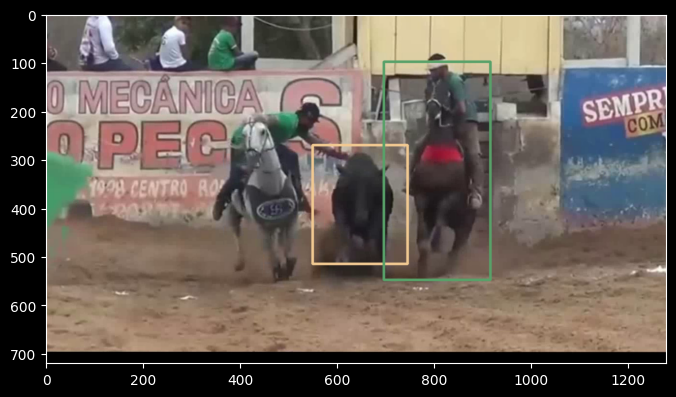

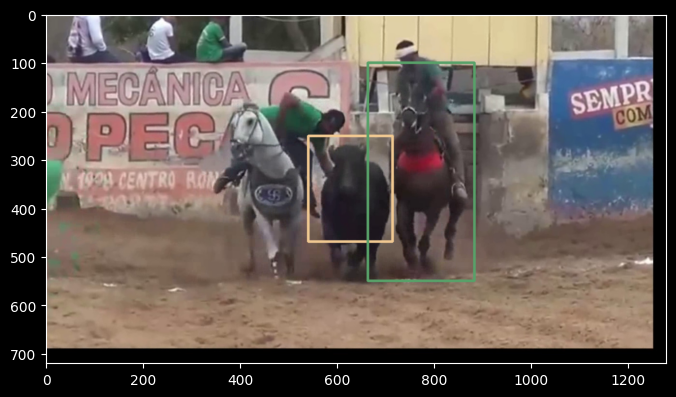

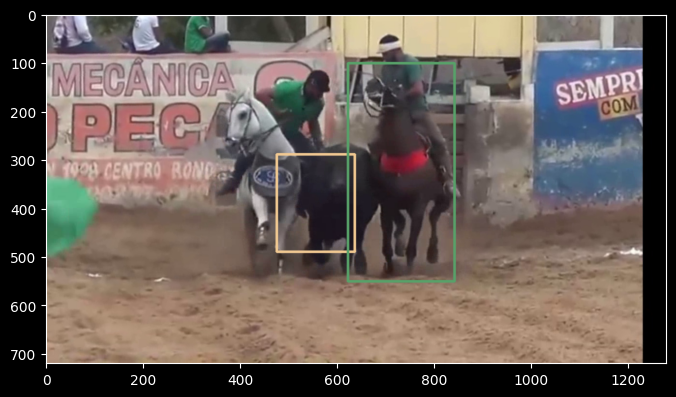

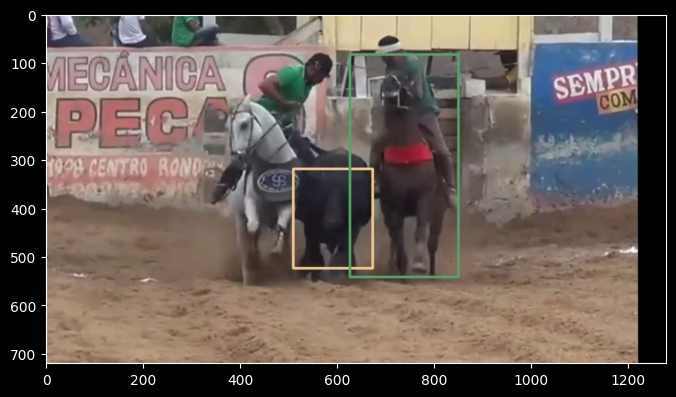

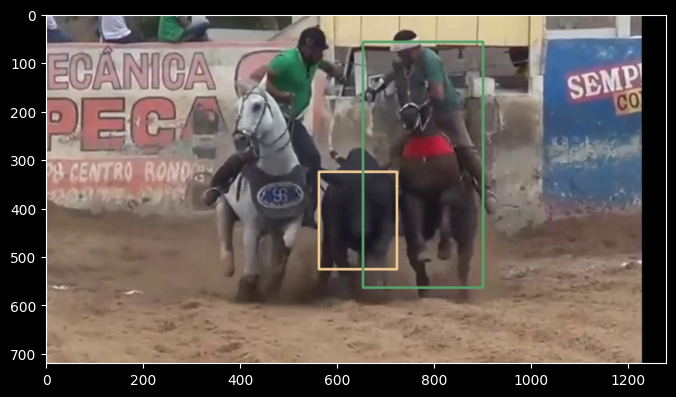

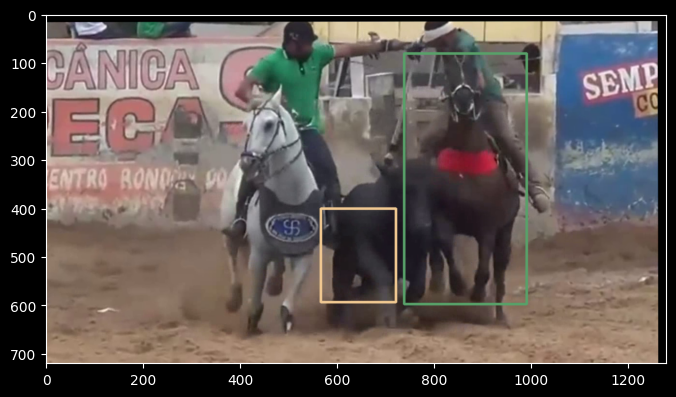

In [81]:
# We will display only 5 frames
count = 0

# Process video and track objects
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # get updated location of objects in subsequent frames
    success, boxes = multiTracker.update(frame)

    # draw tracked objects
    for i, newbox in enumerate(boxes):
        p1 = (int(newbox[0]), int(newbox[1]))
        p2 = (int(newbox[0] + newbox[2]), int(newbox[1] + newbox[3]))
        cv2.rectangle(frame, p1, p2, colors[i], 4, cv2.LINE_AA)

    # show frame
    if count % 10 == 0:
        plt.imshow(frame[:,:,::-1])
        plt.show()

    count += 1

    if count > 50:
        break

In [82]:
# Definir as configurações do vídeo de saída
output_file = 'output_video.mp4'
output_fps = 30.0  # Taxa de frames por segundo do vídeo de saída
output_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
output_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter(output_file, fourcc, output_fps, (int(output_width), int(output_height)))


# Process video and track objects
while True:
    # Ler um novo frame
    ok, frame = cap.read()
    if not ok:
        break

    # get updated location of objects in subsequent frames
    success, boxes = multiTracker.update(frame)

    # draw tracked objects
    for i, newbox in enumerate(boxes):
        p1 = (int(newbox[0]), int(newbox[1]))
        p2 = (int(newbox[0] + newbox[2]), int(newbox[1] + newbox[3]))
        cv2.rectangle(frame, p1, p2, colors[i], 4, cv2.LINE_AA)

    # show frame
    if count % 10 == 0:
        plt.imshow(frame[:,:,::-1])
        plt.show()

    # Exibir o resultado
    cv2.imshow("Imagem", frame)

    # Salvar o frame no vídeo de saída
    output_video.write(frame)

    # Verificar se a tecla 'q' foi pressionada
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
cap.release()
output_video.release()
cv2.destroyAllWindows()


https://www.pyimagesearch.com/2018/10/29/multi-object-tracking-with-dlib/
https://www.learnopencv.com/multitracker-multiple-object-tracking-using-opencv-c-python/